# Genes shared by all diplomonads

excluding fornicata

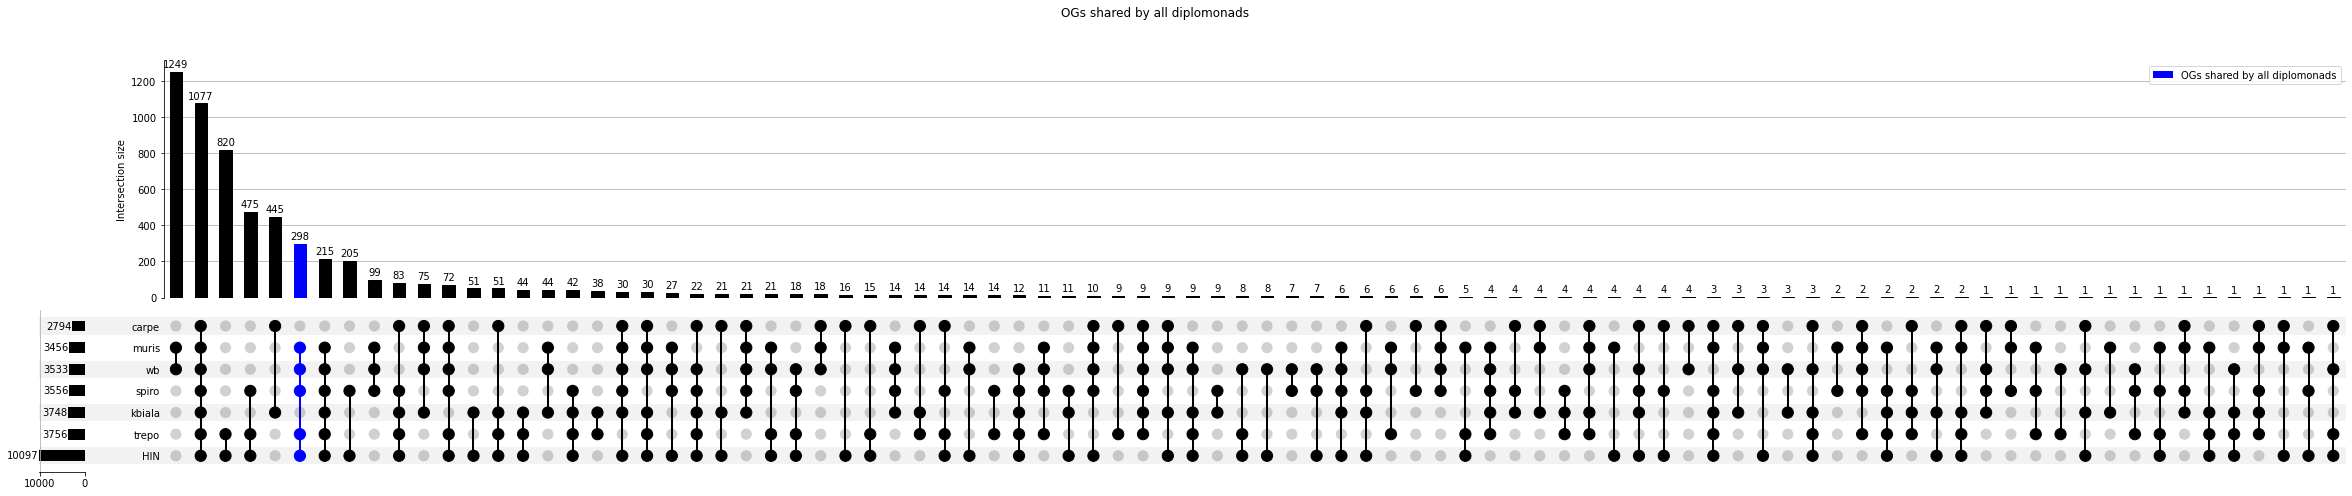

In [16]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG, singletons are excluded"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).\
    set_index(df_count.spiro >= 1, append=True).\
    set_index(df_count.wb >= 1, append=True).\
    set_index(df_count.muris >= 1, append=True).\
    set_index(df_count.trepo >= 1, append=True).\
    set_index(df_count.kbiala >= 1, append=True).\
    set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")

upset.style_subsets(absent=["kbiala", "carpe"],
                    min_degree=5,
                    facecolor="blue",
                    label="OGs shared by all diplomonads")

upset.plot()
plt.suptitle("OGs shared by all diplomonads")
plt.show()

## Extract genes from OGs


In [8]:
import pandas as pd
"OG shared by all diplomonads"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_diplo=df[(df.iloc[:,[1,2,3,4,5]] >=1).all(1) & (df.iloc[:,[6,7]] ==0).all(1)]

print("Number of OGs = ", len(og_diplo["Orthogroup"]))
print("Total genes =", og_diplo["Total"].sum())
print("Total HIN genes =", og_diplo["HIN"].sum())
print("Total trepo genes =", og_diplo["trepo"].sum())
print("Total spiro genes =", og_diplo["spiro"].sum())
print("Total wb genes =", og_diplo["wb"].sum())
print("Total muris genes =", og_diplo["muris"].sum())


og_diplo.head()

Number of OGs =  298
Total genes = 2598
Total HIN genes = 1207
Total trepo genes = 379
Total spiro genes = 360
Total wb genes = 330
Total muris genes = 322


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
195,OG0000195,32,11,7,2,2,0,0,54
377,OG0000377,27,2,2,1,1,0,0,33
403,OG0000403,25,2,2,1,1,0,0,31
497,OG0000497,6,2,6,6,6,0,0,26
501,OG0000501,21,1,2,1,1,0,0,26


In [9]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_diplo).head()

,OG0000195,OG0000377,OG0000403,OG0000497,OG0000501,OG0000536,OG0000575,OG0000675,OG0000883,OG0000899,...,OG0004905,OG0004912,OG0004913,OG0004916,OG0004925,OG0004948,OG0004949,OG0004952,OG0006006,OG0006075
1,GL50803_35341,GL50803_16599,GL50803_61276,GL50803_11209,GL50803_61550,GL50803_10330,GL50803_104250,GL50803_16006,GL50803_678,GL50803_26749,...,GL50803_5603,GL50803_8604,GL50803_11557,GL50803_11771,GL50803_16192,GL50803_14054,GL50803_8135,GL50803_17280,GL50803_9427,GL50803_16926
2,GL50803_37350,GMRT_15869,GMRT_14239,GL50803_137680,GMRT_11522,GL50803_113038,GL50803_3910,GMRT_13946,GMRT_16347,GMRT_12384,...,GMRT_10909,GMRT_12712,GMRT_15190,GMRT_15517,GMRT_13762,GMRT_14394,GMRT_13346,GMRT_14388,GMRT_13197,GMRT_10817
3,GMRT_13162,HIN_002795,HIN_003706,GL50803_17607,HIN_009664,GL50803_114815,GMRT_15366,HIN_020958,HIN_001226,HIN_007453,...,HIN_065946,HIN_066682,HIN_066689,HIN_066967,HIN_070252,HIN_090757,HIN_090772,HIN_093020,HIN_059843,HIN_097892
4,GMRT_13237,HIN_003720,HIN_019755,GL50803_3099,HIN_009677,GL50803_14573,HIN_001514,HIN_020961,HIN_001229,HIN_007465,...,HIN_070852,HIN_078130,HIN_078124,HIN_094476,HIN_093955,HIN_093023,HIN_093860,SS50377_24151,SS50377_21191,SS50377_25538
5,HIN_004709,HIN_003751,HIN_019756,GL50803_3169,HIN_009690,GL50803_16322,HIN_002146,HIN_020964,HIN_013098,HIN_007470,...,SS50377_23242,SS50377_21232,SS50377_23334,SS50377_23592,SS50377_28224,SS50377_25390,SS50377_28335,SS50377_24154,TPC1_11163,TPC1_16186


In [67]:
extract_prot(og_diplo).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_diplo.csv", header="infer", index=False, sep="\t")

## add ncbi annotation

In [10]:
import glob

"OG diplo subset gene list with annotations"
def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0:"OG"}).set_index("OG")
    df=df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack=OG_stack(og_diplo)
"Add annotations"
path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")

def add_annot(df, df_annot):
    df=pd.merge(df, df_annot, right_on="id", left_on=0, how="left").drop(columns=[0]).dropna()
    return df

df1=add_annot(OG_stack(og_diplo), dic_annot["HIN"])
df2=add_annot(OG_stack(og_diplo), dic_annot["spiro"])
df3=add_annot(OG_stack(og_diplo), dic_annot["muris"])
df4=add_annot(OG_stack(og_diplo), dic_annot["wb"])
df5=add_annot(OG_stack(og_diplo), dic_annot["trepo"])

df_og_stack_annot=pd.concat([df1,df2,df3,df4,df5], axis=0)
df_og_stack_annot


,OG,id,desc
4,OG0000195,HIN_004709,HIN_004709 Conserved hypothetical protein
5,OG0000195,HIN_004711,HIN_004711 Conserved hypothetical protein
6,OG0000195,HIN_012689,HIN_012689 Conserved hypothetical protein
7,OG0000195,HIN_018727,HIN_018727 Conserved hypothetical protein
8,OG0000195,HIN_018728,HIN_018728 Conserved hypothetical protein
...,...,...,...
2575,OG0004948,TPC1_10881,TPC1_10881 ARID/BRIGHT DNA binding domain-cont...
2581,OG0004949,TPC1_14872,TPC1_14872 Conserved hypothetical protein
2587,OG0004952,TPC1_13551,TPC1_13551 Conserved hypothetical protein
2592,OG0006006,TPC1_11163,TPC1_11163 Conserved hypothetical protein


In [100]:
df_og_stack_annot.to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_diplo_annot.csv",sep="\t", header="infer", index=False)

## add interproscan annotation

In [11]:
import pandas as pd
import glob

"OG diplo subset gene list with annotations"
def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0:"OG"}).set_index("OG")
    df=df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack=OG_stack(og_diplo)

path = '/Users/zeyku390/PycharmProjects/H.inflata/resource/3_interproscan/*.tsv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split(".")[1]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header=None, names=list(range(0, 15)),
                           engine='python', quoting=3)


def add_annot(df, df_annot):
    df=pd.merge(df, df_annot, on=0)
    return df

df1=add_annot(OG_stack(og_diplo), dic_annot["HIN"])
df2=add_annot(OG_stack(og_diplo), dic_annot["spiro"])
df3=add_annot(OG_stack(og_diplo), dic_annot["muris"])
df4=add_annot(OG_stack(og_diplo), dic_annot["wb"])
df5=add_annot(OG_stack(og_diplo), dic_annot["trepo"])

df_og_stack_ipr=pd.concat([df1,df2,df3,df4,df5], axis=0)
df_og_stack_ipr

,OG,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,OG0000195,HIN_004709,00abdac3fe64767cedc8d308352e57af,1243,MobiDBLite,mobidb-lite,consensus disorder prediction,321,367,-,T,13-10-2020,None,None,None,None
1,OG0000195,HIN_004709,00abdac3fe64767cedc8d308352e57af,1243,MobiDBLite,mobidb-lite,consensus disorder prediction,342,360,-,T,13-10-2020,None,None,None,None
2,OG0000195,HIN_004709,00abdac3fe64767cedc8d308352e57af,1243,Coils,Coil,Coil,332,359,-,T,13-10-2020,None,None,None,None
3,OG0000195,HIN_004709,00abdac3fe64767cedc8d308352e57af,1243,MobiDBLite,mobidb-lite,consensus disorder prediction,325,341,-,T,13-10-2020,None,None,None,None
4,OG0000195,HIN_004711,f9033d740e804ba4eefce974aba9ffaf,4783,MobiDBLite,mobidb-lite,consensus disorder prediction,3567,3591,-,T,13-10-2020,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,OG0006075,TPC1_16186,6690924450a483bdd1057a9e37197e26,411,Coils,Coil,Coil,349,376,-,T,20-10-2022,None,None,None,None
1422,OG0006075,TPC1_16186,6690924450a483bdd1057a9e37197e26,411,MobiDBLite,mobidb-lite,consensus disorder prediction,160,194,-,T,20-10-2022,None,None,None,None
1423,OG0006075,TPC1_16186,6690924450a483bdd1057a9e37197e26,411,MobiDBLite,mobidb-lite,consensus disorder prediction,223,238,-,T,20-10-2022,None,None,None,None
1424,OG0006075,TPC1_16186,6690924450a483bdd1057a9e37197e26,411,Coils,Coil,Coil,379,408,-,T,20-10-2022,None,None,None,None


In [7]:
df_og_stack_ipr.drop(columns="OG").to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_diplo_ipr.csv",sep="\t", header="infer", index=False)

## add eggnog annotation

In [12]:
import glob

"OG diplo subset gene list with annotations"
def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0:"OG"}).set_index("OG")
    df=df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack=OG_stack(og_diplo)


path = '/Users/zeyku390/PycharmProjects/H.inflata/resource/4_eggnog/eggnog/*.annotations'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split(".")[1]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t",  header="infer", skiprows=3)


def add_annot(df, df_annot):
    df=pd.merge(df, df_annot,right_on="#query_name",left_on=0 )
    return df

df1=add_annot(OG_stack(og_diplo), dic_annot["HIN_NOG"])
df2=add_annot(OG_stack(og_diplo), dic_annot["spiro_NOG"])
df3=add_annot(OG_stack(og_diplo), dic_annot["muris_NOG"])
df4=add_annot(OG_stack(og_diplo), dic_annot["wb_NOG"])
df5=add_annot(OG_stack(og_diplo), dic_annot["trepo_NOG"])

df_og_stack_egg=pd.concat([df1,df2,df3,df4,df5], axis=0)
df_og_stack_egg

,OG,0,#query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,predicted_gene_name,GO_terms,KEGG_KOs,BiGG_reactions,Annotation_tax_scope,OGs,bestOG|evalue|score,COG cat,eggNOG annot
0,OG0000195,SS50377_26804,SS50377_26804,5825.PCHAS_061740,1.700000e-11,79.7,NaN,"GO:0000166,GO:0000226,GO:0001882,GO:0001883,GO...","K10408,K10413",NaN,euNOG[57],"COG5245@NOG,KOG3595@euNOG",NA|NA|NA,Z,heavy chain
1,OG0000377,SS50377_24405,SS50377_24405,5911.EAS03660,4.500000e-12,79.7,ADCY9,"GO:0001932,GO:0001934,GO:0002119,GO:0002164,GO...","K01769,K08049",NaN,euNOG[57],"COG0474@NOG,COG2114@NOG,KOG0206@euNOG,KOG1023@...",NA|NA|NA,T,adenylate cyclase 9
2,OG0000497,SS50377_24705,SS50377_24705,184922.XP_001709898.1,1.300000e-37,162.9,NaN,NaN,NaN,NaN,euNOG[57],"0J697@euNOG,123EX@NOG",NA|NA|NA,O,Serine repeat antigen
3,OG0000497,SS50377_24907,SS50377_24907,184922.XP_001708615.1,5.000000e-25,120.9,NaN,"GO:0000003,GO:0000746,GO:0000747,GO:0003674,GO...",K01365,NaN,euNOG[57],"COG4870@NOG,KOG1543@euNOG",NA|NA|NA,O,cathepsin
4,OG0000497,SS50377_26948,SS50377_26948,184922.XP_001709898.1,5.600000e-38,164.1,NaN,NaN,NaN,NaN,euNOG[57],"0J697@euNOG,123EX@NOG",NA|NA|NA,O,Serine repeat antigen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,OG0004546,TPC1_17373,TPC1_17373,573826.XP_002419823.1,6.200000e-13,80.5,FG09800.1,"GO:0005575,GO:0005622,GO:0005623,GO:0005634,GO...",NaN,NaN,fuNOG[21],"03KCQ@ascNOG,0PHEG@fuNOG,110HD@NOG,13IT8@opiNO...",NA|NA|NA,T,TAP42-like family
125,OG0004905,TPC1_14082,TPC1_14082,4641.GSMUA_Achr7P26800_001,9.400000e-09,67.8,COPG2,"GO:0000003,GO:0000139,GO:0000902,GO:0000910,GO...",K17267,NaN,euNOG[57],"COG5240@NOG,KOG1078@euNOG",NA|NA|NA,U,The coatomer is a cytosolic protein complex th...
126,OG0004925,TPC1_14983,TPC1_14983,412030.XP_001462237.1,4.800000e-48,198.4,NaN,NaN,K18626,NaN,euNOG[57],"COG0457@NOG,KOG4626@euNOG",NA|NA|NA,"G, O, T",whole genome shotgun sequence
127,OG0006006,TPC1_11163,TPC1_11163,653948.CCA23361,8.000000e-08,62.4,KTI12,"GO:0000166,GO:0000428,GO:0001882,GO:0001883,GO...","K02435,K15456",NaN,euNOG[57],"0IP8V@euNOG,COG4088@NOG,COG4642@NOG,KOG3062@euNOG",NA|NA|NA,J,"KTI12 homolog, chromatin associated (S. cerevi..."


## Summary Annotation

In [14]:
df_sum=pd.merge(df_og_stack_annot,df_og_stack_ipr, right_on=[0, "OG"], left_on=["id", "OG"])
df_sum=pd.merge(df_sum,df_og_stack_egg, on=[0, "OG"])
df_sum[["OG", 0, "desc", 5, 11,12, "COG cat", "eggNOG annot"]]

,OG,0,desc,5,11,12,COG cat,eggNOG annot
0,OG0000195,SS50377_26804,SS50377_26804 Hypothetical protein,Coil,None,None,Z,heavy chain
1,OG0000195,SS50377_26804,SS50377_26804 Hypothetical protein,consensus disorder prediction,None,None,Z,heavy chain
2,OG0000377,SS50377_24405,SS50377_24405 Nucleotidyl cyclase,cyc_6,IPR001054,Adenylyl cyclase class-3/4/guanylyl cyclase,T,adenylate cyclase 9
3,OG0000377,SS50377_24405,SS50377_24405 Nucleotidyl cyclase,Adenylate and Guanylate cyclase catalytic domain,IPR001054,Adenylyl cyclase class-3/4/guanylyl cyclase,T,adenylate cyclase 9
4,OG0000377,SS50377_24405,SS50377_24405 Nucleotidyl cyclase,Adenylate and Guanylate cyclase catalytic domain,IPR001054,Adenylyl cyclase class-3/4/guanylyl cyclase,T,adenylate cyclase 9
...,...,...,...,...,...,...,...,...
4302,OG0006075,TPC1_16186,TPC1_16186 Conserved hypothetical protein,Coil,None,None,T,Inherit from NOG: FHA domaincontaining protein
4303,OG0006075,TPC1_16186,TPC1_16186 Conserved hypothetical protein,consensus disorder prediction,None,None,T,Inherit from NOG: FHA domaincontaining protein
4304,OG0006075,TPC1_16186,TPC1_16186 Conserved hypothetical protein,consensus disorder prediction,None,None,T,Inherit from NOG: FHA domaincontaining protein
4305,OG0006075,TPC1_16186,TPC1_16186 Conserved hypothetical protein,Coil,None,None,T,Inherit from NOG: FHA domaincontaining protein
